In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as smi
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statistics import mean
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU, Dropout, Conv1D, MaxPooling1D, Flatten, RepeatVector
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from hyperopt import hp, Trials, fmin, tpe
import joblib
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv(r'E:\A aPython Programms\Data1\Bank.csv')
df.tail(5)

,Date,AXISBANK,AXISVOL,BAJAJFIN,BAJAJFINVOL,BOB,BOBVOL,FEDBANK,FEDVOL,HDFC,...,KOTAK,KOTAKVOL,PNB,PNBVOL,SBI,SBIVOL,REC,RECVOL,PIRAMAL,PIRAMALVOL
3748,21-03-2024,1035.599976,9903738,6715.750000,1806092,255.699997,10121220,149.949997,6212045,1445.750000,...,1772.150024,3783681,121.050003,38099730,744.299988,15161161,450.250000,18429233,841.599976,987716
3749,22-03-2024,1033.300049,9891194,6760.899902,1125238,259.799988,11402546,149.600006,8409218,1442.849976,...,1776.400024,7061283,122.750000,35001868,746.700012,15535921,460.100006,12531582,861.500000,1618543
3750,26-03-2024,1040.550049,9656767,6910.100098,1850321,261.549988,8259347,149.800003,7742995,1425.400024,...,1753.699951,5303630,123.949997,30860596,740.049988,14678342,461.399994,10475524,858.250000,1391794
3751,27-03-2024,1052.849976,17027308,7022.750000,1551275,258.750000,19196992,149.800003,20853016,1440.699951,...,1775.599976,8231130,122.750000,42673023,733.299988,30088789,445.600006,28138339,840.200012,1344329
3752,28-03-2024,1047.199951,10235318,7245.250000,3574518,264.049988,11966752,150.199997,7208707,1447.900024,...,1785.500000,6630072,124.400002,29453142,752.349976,21705116,451.000000,12637899,849.349976,5261416


In [3]:
feature_columns = [ 'SBI', 'SBIVOL']
target_column = ['SBI']
features = df[feature_columns]
target = df[target_column].shift(-5)

new_data1 = 758.30
target.iloc[-5, 0] = new_data1

new_data2 = 766.40
target.iloc[-4, 0] = new_data2

new_data3 = 771.05
target.iloc[-3, 0] = new_data3

new_data4 = 759.30
target.iloc[-2, 0] = new_data4

new_data5 = 764.75
target.iloc[-1, 0] = new_data5

target.tail(5)

,SBI
3748,758.30
3749,766.40
3750,771.05
3751,759.30
3752,764.75


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

n_steps = 5  # Number of timesteps to look back
X, y = [], []

for i in range(n_steps, len(scaled_features)):
    X.append(scaled_features[i-n_steps:i])
    y.append(scaled_target[i])

X = np.array(X)
y = np.array(y)

split=int(0.8*len(X))
X_train, y_train= X[:split], y[:split]
X_test, y_test= X[split:], y[split:]

In [5]:
model_lstm = load_model('model_lstm_sbi5_0.9231.keras')
model_lstm.predict(X_test)

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae_n=mean_absolute_error(y_test, predictions_lstm)
print(f"MAE_normalizeddata: {mae_n:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R2: 0.9231
MAPE: 0.0354
RMSE: 24.2913
RMSE_normalizeddata: 0.0348
MAE_normalizeddata: 0.0273
MAE: 19.0865


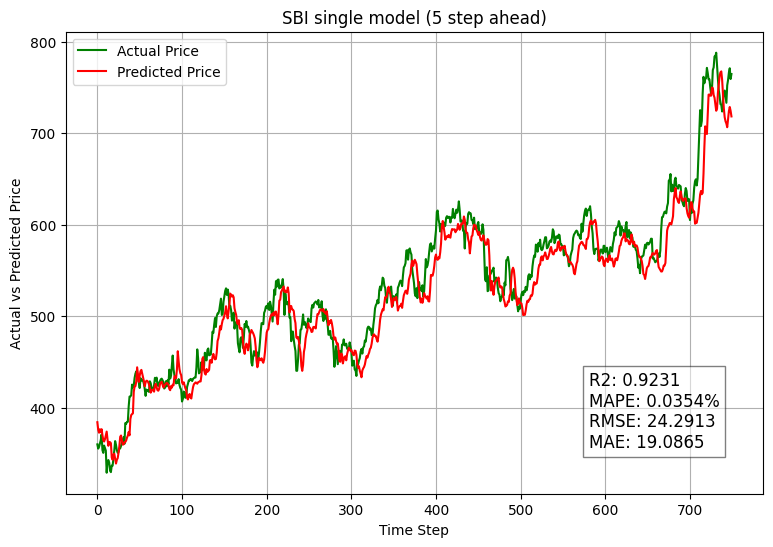

In [6]:
plt.figure(figsize=(9, 6))
plt.plot(y_test_actual_LSTM, color='green', label=['Actual Price'])
plt.plot(predictions_LSTM, color='red', label=['Predicted Price'])
plt.legend(['Actual Price', 'Predicted Price'], loc='upper left')

plt.text(0.75, 0.1, f'R2: {r2:.4f}\nMAPE: {mape:.4f}%\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.grid(True)
plt.title('SBI single model (5 step ahead)')
plt.xlabel('Time Step')
plt.ylabel('Actual vs Predicted Price')
plt.savefig('sbi_5sa-1l.png', dpi=600)  # Saves the plot as a PNG file
plt.show()

In [7]:
model_lstm.predict(X_train)

predictions_train_lstm = model_lstm.predict(X_train)
predictions_train_LSTM = scaler.inverse_transform(predictions_train_lstm)
y_train_actual_LSTM = scaler.inverse_transform(y_train.reshape(-1, 1))

r2=r2_score(y_train_actual_LSTM, predictions_train_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_train_actual_LSTM, predictions_train_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_train_actual_LSTM, predictions_train_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_train, predictions_train_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae_n=mean_absolute_error(y_train, predictions_train_lstm)
print(f"MAE_normalizeddata: {mae_n:.4f}")

mae=mean_absolute_error(y_train_actual_LSTM, predictions_train_LSTM)
print(f"MAE: {mae:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R2: 0.9214
MAPE: 0.0493
RMSE: 15.2039
RMSE_normalizeddata: 0.0218
MAE_normalizeddata: 0.0164
MAE: 11.4852


In [26]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])
predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0107 - val_loss: 0.0033
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 5.4158e-04 - val_loss: 0.0065
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 4.9043e-04 - val_loss: 0.0068
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.8054e-04 - val_loss: 0.0045
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.9953e-04 - val_loss: 0.0052
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.9595e-04 - val_loss: 0.0043
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.0331e-04 - val_loss: 0.0029
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.0269e-04 - val_loss: 0.0051
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.1425e-04 - val_loss: 0.0023
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.6762e-04 - val_loss: 0.0037
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.2312e-04 - val_loss: 0.0030
Epoch 12/20

In [27]:
model_lstm.save('model_lstm_SBI5_1.keras')

In [28]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])
predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0135 - val_loss: 0.0019
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.4771e-04 - val_loss: 0.0038
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.9822e-04 - val_loss: 0.0047
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.4322e-04 - val_loss: 0.0050
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 5.1116e-04 - val_loss: 0.0037
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.0028e-04 - val_loss: 0.0052
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 4.7336e-04 - val_loss: 0.0063
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.0952e-04 - val_loss: 0.0069
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.7133e-04 - val_loss: 0.0033
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.0799e-04 - val_loss: 0.0056
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.0324e-04 - val_loss: 0.0036
Epoch 12/200

In [29]:
model_lstm.save('model_lstm_SBI5_2.keras')

In [30]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])
predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0111 - val_loss: 0.0013
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.2019e-04 - val_loss: 0.0021
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.3636e-04 - val_loss: 0.0023
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 5.0389e-04 - val_loss: 0.0023
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.5577e-04 - val_loss: 0.0022
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.0867e-04 - val_loss: 0.0036
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.9996e-04 - val_loss: 0.0039
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.1956e-04 - val_loss: 0.0039
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 5.5558e-04 - val_loss: 0.0033
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.5655e-04 - val_loss: 0.0032
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1328e-04 - val_loss: 0.0023
Epoch 12/200

In [31]:
model_lstm.save('model_lstm_SBI5_3.keras')

In [32]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])
predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0089 - val_loss: 0.0012
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.2650e-04 - val_loss: 0.0030
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.0853e-04 - val_loss: 0.0028
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.7643e-04 - val_loss: 0.0020
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4.8130e-04 - val_loss: 0.0027
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.0000e-04 - val_loss: 0.0032
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4.8910e-04 - val_loss: 0.0051
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 4.8291e-04 - val_loss: 0.0030
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.6181e-04 - val_loss: 0.0029
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.7191e-04 - val_loss: 0.0040
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 4.6922e-04 - val_loss: 0.0019
Epoch 12/20

In [33]:
model_lstm.save('model_lstm_SBI5_4.keras')

In [34]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])
predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0138 - val_loss: 0.0015
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.0589e-04 - val_loss: 0.0013
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 4.8672e-04 - val_loss: 0.0012
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 5.1309e-04 - val_loss: 0.0027
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1737e-04 - val_loss: 0.0031
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 5.3357e-04 - val_loss: 0.0022
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.0423e-04 - val_loss: 0.0045
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.8857e-04 - val_loss: 0.0045
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.0476e-04 - val_loss: 0.0030
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.9688e-04 - val_loss: 0.0038
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.9139e-04 - val_loss: 0.0048
Epoch 12/20

In [35]:
model_lstm.save('model_lstm_SBI5_5.keras')

In [36]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])
predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0120 - val_loss: 0.0028
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.2088e-04 - val_loss: 0.0024
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.1064e-04 - val_loss: 0.0028
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.0352e-04 - val_loss: 0.0019
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.9203e-04 - val_loss: 0.0021
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.0940e-04 - val_loss: 0.0016
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.8160e-04 - val_loss: 0.0054
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.3758e-04 - val_loss: 0.0035
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.3528e-04 - val_loss: 0.0018
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.6380e-04 - val_loss: 0.0034
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.0924e-04 - val_loss: 0.0056
Epoch 12/20

In [37]:
model_lstm.save('model_lstm_SBI5_6.keras')

In [38]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])
predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.0127 - val_loss: 0.0013
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.8078e-04 - val_loss: 0.0023
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.1667e-04 - val_loss: 0.0036
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.3947e-04 - val_loss: 0.0045
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.9639e-04 - val_loss: 0.0020
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 4.6917e-04 - val_loss: 0.0042
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.4229e-04 - val_loss: 0.0029
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.0313e-04 - val_loss: 0.0033
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 5.1449e-04 - val_loss: 0.0041
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 4.9847e-04 - val_loss: 0.0038
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.5714e-04 - val_loss: 0.0046
Epoch 12/20

In [39]:
model_lstm.save('model_lstm_SBI5_7.keras')

In [40]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])
predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.0107 - val_loss: 0.0016
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 5.3992e-04 - val_loss: 0.0030
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 4.7701e-04 - val_loss: 0.0036
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.2953e-04 - val_loss: 0.0044
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 5.2861e-04 - val_loss: 0.0038
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.9997e-04 - val_loss: 0.0026
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 5.2408e-04 - val_loss: 0.0031
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 4.8825e-04 - val_loss: 0.0027
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.0147e-04 - val_loss: 0.0046
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 4.4003e-04 - val_loss: 0.0040
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 4.4193e-04 - val_loss: 0.0022
Epoch 12/20

In [41]:
model_lstm.save('model_lstm_SBI5_8.keras')

In [42]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])
predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0092 - val_loss: 0.0012
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.5468e-04 - val_loss: 0.0017
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 5.2740e-04 - val_loss: 0.0027
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 4.7323e-04 - val_loss: 0.0041
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 5.0315e-04 - val_loss: 0.0029
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.7403e-04 - val_loss: 0.0022
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 5.0133e-04 - val_loss: 0.0023
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4.7384e-04 - val_loss: 0.0045
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 4.9202e-04 - val_loss: 0.0028
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 4.8742e-04 - val_loss: 0.0033
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 4.9006e-04 - val_loss: 0.0027
Epoch 12/20

In [43]:
model_lstm.save('model_lstm_SBI5_9.keras')

In [44]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])
predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0111 - val_loss: 0.0014
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 5.6288e-04 - val_loss: 0.0021
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 5.6553e-04 - val_loss: 0.0029
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 5.4878e-04 - val_loss: 0.0034
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 5.4269e-04 - val_loss: 0.0042
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.0945e-04 - val_loss: 0.0048
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 4.8737e-04 - val_loss: 0.0030
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.3938e-04 - val_loss: 0.0031
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.8682e-04 - val_loss: 0.0035
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 4.7395e-04 - val_loss: 0.0014
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 4.9411e-04 - val_loss: 0.0032
Epoch 12/200

In [45]:
model_lstm.save('model_lstm_SBI5_10.keras')